## PLOT CONFLICT ANALYSIS

In [1]:
#conflict
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
from pandas import DataFrame as df
from mpld3 import plugins, fig_to_html, save_html, fig_to_dict
from tqdm import tqdm
import numpy as np
import json
from tensorflow.keras.preprocessing.text import text_to_word_sequence
#character, setting
import numpy as np
import gensim
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize
import multiprocessing
import os
from pathlib import Path
import io
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
input_text = """Bloomington Normal is almost laughably cliché for a midwestern city. Vast swathes of corn envelop winding roads and the heady smell of BBQ smoke pervades the countryside every summer. Yet, underlying the trite norms of Normal is the prescriptive force of tradition—the expectation to fulfill my role as a female Filipino by playing Debussy in the yearly piano festival and enrolling in multivariable calculus instead of political philosophy.So when I discovered the technical demand of bebop, the triplet groove, and the intricacies of chordal harmony after ten years of grueling classical piano, I was fascinated by the music's novelty. Jazz guitar was not only evocative and creative, but also strangely liberating. I began to explore different pedagogical methods, transcribe solos from the greats, and experiment with various approaches until my own unique sound began to develop. And, although I did not know what would be the 'best' route for me to follow as a musician, the freedom to forge whatever path I felt was right seemed to be exactly what I needed; there were no expectations for me to continue in any particular way—only the way that suited my own desires.While journeying this trail, I found myself at Interlochen Arts Camp the summer before my junior year. Never before had I been immersed in an environment so conducive to musical growth: I was surrounded by people intensely passionate about pursuing all kinds of art with no regard for ideas of what art 'should' be. I knew immediately that this would be a perfect opportunity to cultivate my sound, unbounded by the limits of confining tradition. On the first day of camp, I found that my peer guitarist in big band was another Filipino girl from Illinois. Until that moment, my endeavors in jazz guitar had been a solitary effort; I had no one with whom to collaborate and no one against whom I could compare myself, much less someone from a background mirroring my own. I was eager to play with her, but while I quickly recognized a slew of differences between us—different heights, guitars, and even playing styles—others seemed to have trouble making that distinction during performances. Some even went as far as calling me 'other-Francesca.' Thus, amidst the glittering lakes and musky pine needles of Interlochen, I once again confronted Bloomington's frustrating expectations.After being mistaken for her several times, I could not help but view Francesca as a standard of what the 'female Filipino jazz guitarist' should embody. Her improvisatory language, comping style and even personal qualities loomed above me as something I had to live up to. Nevertheless, as Francesca and I continued to play together, it was not long before we connected through our creative pursuit. In time, I learned to draw inspiration from her instead of feeling pressured to follow whatever precedent I thought she set. I found that I grew because of, rather than in spite of, her presence; I could find solace in our similarities and even a sense of comfort in an unfamiliar environment without being trapped by expectation. Though the pressure to conform was still present—and will likely remain present in my life no matter what genre I'm playing or what pursuits I engage in—I learned to eschew its corrosive influence and enjoy the rewards that it brings. While my encounter with Francesca at first sparked a feeling of pressure to conform in a setting where I never thought I would feel its presence, it also carried the warmth of finding someone with whom I could connect. Like the admittedly trite conditions of my hometown, the resemblances between us provided comfort to me through their familiarity. I ultimately found that I can embrace this warmth while still rejecting the pressure to succumb to expectations, and that, in the careful balance between these elements, I can grow in a way that feels both like discove"""

In [3]:
#유사단어를 추출하여 리스트로 반환

def conflict_sim_words(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #표현하는 단어들을 리스트에 넣어서 필터로 만들고
    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]
    
    ####문장에 list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in confict_words_list:
            if k == j:
                filtered_chr_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인
    
    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된  표현 총 수
        
    result_char_ratio = round(char_total_count/total_words * 100, 2)
    
    df_conf_words = pd.DataFrame(ext_sim_words_key, columns=['words','values']) #데이터프레임으로 변환
    df_r = df_conf_words['words'] #words 컬럼 값 추출
    ext_sim_words_key = df_r.values.tolist() # 유사단어 추출

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return ext_sim_words_key


In [4]:
conflict_sim_words_ratio_result = conflict_sim_words(input_text)

#유사단어를 문장에서 추출하여 반환한다.

conflict_sim_words_ratio_result # 이것을 다음 코드에 적용한다.

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


['heights',
 'guitars',
 'differences',
 'explore',
 'pedagogical',
 'methods',
 'slew',
 'us',
 'transcribe',
 'styles']

In [5]:
# conflocit ratio Analysis...
#conflict(input_text):
contents = str(input_text)
token_list_str = text_to_word_sequence(contents) #tokenize

confict_words_list_basic = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                        'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                        'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                        'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                        'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]

confict_words_list = confict_words_list_basic + conflict_sim_words_ratio_result #유사단어를 계산결과 반영!

count_conflict_list = []
for i in token_list_str:
    for j in confict_words_list:
        if i == j:
            count_conflict_list.append(j)

len(count_conflict_list)#한 문장에 들어있는 conflict 단어 수



list_str = contents.split(".")  #문장별로 분리한다. 분리는 .를 기준으로 한다.   


listSentiment = []

sid = SentimentIntensityAnalyzer()

i=0
for sentence in tqdm(list_str): #한문장식 가져와서 처리한다.
    ss = sid.polarity_scores(sentence) #긍정, 부정, 중립, 혼합점수 계산
    #print(ss.keys())
    #print('{}: neg:{},neu:{},pos:{},compound:{}'.format(i,ss['neg'],ss['neu'],ss['pos'],ss['compound']))
    #print('{}: neg:{}'.format(i,ss['neg']))
    i +=1
    listSentiment.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

df_sent = pd.DataFrame(listSentiment)
df_sent.columns = ['neg', 'neu', 'pos','compound']
reslult_df = df_sent.columns


df_sent['comp_score'] = df_sent['compound'].apply(lambda c: 'pos' if c >=0  else 'neg')

df_sent['comp_score'].value_counts()

conflict_ratio = df_sent['comp_score'].value_counts(normalize=True) #상대적 비율 계산

#return reslult_df

100%|██████████| 24/24 [00:00<00:00, 3437.25it/s]


In [6]:
df_sent

,neg,neu,pos,compound,comp_score
0,0.000,0.808,0.192,0.2280,pos
1,0.000,1.000,0.000,0.0000,pos
2,0.041,0.778,0.181,0.7269,pos
3,0.044,0.787,0.169,0.6486,pos
4,0.190,0.678,0.132,-0.2144,neg
5,0.000,1.000,0.000,0.0000,pos
6,0.040,0.884,0.076,0.4588,pos
7,0.000,1.000,0.000,0.0000,pos
8,0.054,0.790,0.155,0.6240,pos
9,0.000,0.723,0.277,0.7579,pos


In [7]:
df_sent.loc[df_sent["comp_score"] == "pos","comp_score"] = 1
df_sent.loc[df_sent["comp_score"] == "neg","comp_score"] = -1
df_sent

,neg,neu,pos,compound,comp_score
0,0.000,0.808,0.192,0.2280,1
1,0.000,1.000,0.000,0.0000,1
2,0.041,0.778,0.181,0.7269,1
3,0.044,0.787,0.169,0.6486,1
4,0.190,0.678,0.132,-0.2144,-1
5,0.000,1.000,0.000,0.0000,1
6,0.040,0.884,0.076,0.4588,1
7,0.000,1.000,0.000,0.0000,1
8,0.054,0.790,0.155,0.6240,1
9,0.000,0.723,0.277,0.7579,1


## Conflict Words로 그래프를 그려보자

In [8]:
from matplotlib import pyplot as plt

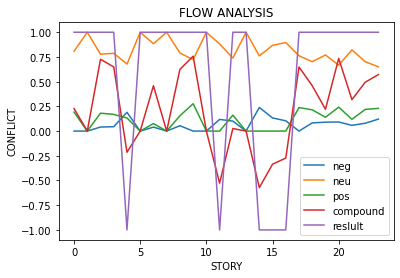

In [9]:
plt.plot(df_sent)
plt.xlabel('STORY')
plt.ylabel('CONFLICT')
plt.title('FLOW ANALYSIS')
plt.legend(['neg','neu','pos','compound','reslult'])
plt.show()

## ACTION VERB로 그래프 그리기
1.action verb 단어집 만들고, 2.문장에 action verb가 있는지 확인하고, 3. 데이터프레임으로 정리해서 4. 그래프로 표현하기(conflic words 그래프에 반영)

In [10]:
#입력한 글을 모두 단어로 쪼개로 리스트로 만들기 - 
essay_input_corpus_ = str(input_text) #문장입력
essay_input_corpus_ = essay_input_corpus_.lower()#소문자 변환

sentences_  = sent_tokenize(essay_input_corpus_) #문장 토큰화

###### 문장을 토크큰화하여 해당 문장에 Action Verbs가 있는지 분석 부분 코드임 ---> 뒤에서 나옴 777 코드부분에서 sentences_ 값 재활용
###############################################################
split_sentences_ = []
for sentence in sentences_:
    processed = re.sub("[^a-zA-Z]"," ", sentence)
    words = processed.split()
    split_sentences_.append(words)
    

input_text_list = [y for x in split_sentences_ for y in x] # 이중 리스트 Flatten
input_text_list # 입력한 문장을 모두 리스트로 변환


['bloomington',
 'normal',
 'is',
 'almost',
 'laughably',
 'clich',
 'for',
 'a',
 'midwestern',
 'city',
 'vast',
 'swathes',
 'of',
 'corn',
 'envelop',
 'winding',
 'roads',
 'and',
 'the',
 'heady',
 'smell',
 'of',
 'bbq',
 'smoke',
 'pervades',
 'the',
 'countryside',
 'every',
 'summer',
 'yet',
 'underlying',
 'the',
 'trite',
 'norms',
 'of',
 'normal',
 'is',
 'the',
 'prescriptive',
 'force',
 'of',
 'tradition',
 'the',
 'expectation',
 'to',
 'fulfill',
 'my',
 'role',
 'as',
 'a',
 'female',
 'filipino',
 'by',
 'playing',
 'debussy',
 'in',
 'the',
 'yearly',
 'piano',
 'festival',
 'and',
 'enrolling',
 'in',
 'multivariable',
 'calculus',
 'instead',
 'of',
 'political',
 'philosophy',
 'so',
 'when',
 'i',
 'discovered',
 'the',
 'technical',
 'demand',
 'of',
 'bebop',
 'the',
 'triplet',
 'groove',
 'and',
 'the',
 'intricacies',
 'of',
 'chordal',
 'harmony',
 'after',
 'ten',
 'years',
 'of',
 'grueling',
 'classical',
 'piano',
 'i',
 'was',
 'fascinated',
 'by'

In [11]:
sentences_  # 확인용

['bloomington normal is almost laughably cliché for a midwestern city.',
 'vast swathes of corn envelop winding roads and the heady smell of bbq smoke pervades the countryside every summer.',
 "yet, underlying the trite norms of normal is the prescriptive force of tradition—the expectation to fulfill my role as a female filipino by playing debussy in the yearly piano festival and enrolling in multivariable calculus instead of political philosophy.so when i discovered the technical demand of bebop, the triplet groove, and the intricacies of chordal harmony after ten years of grueling classical piano, i was fascinated by the music's novelty.",
 'jazz guitar was not only evocative and creative, but also strangely liberating.',
 'i began to explore different pedagogical methods, transcribe solos from the greats, and experiment with various approaches until my own unique sound began to develop.',
 "and, although i did not know what would be the 'best' route for me to follow as a musician, t

In [12]:
#csv 파일에서 단어 사전 불러오기
import pandas as pd

#Awards 데이터 불러오기
data_action_verbs = pd.read_csv('actionverbs.csv')
data_ac_verbs_list = data_action_verbs.values.tolist()
verbs_list = [y for x in data_ac_verbs_list for y in x]
verbs_list

['Maximize',
 'Generate',
 'Gain',
 'Raise',
 'Enhance',
 'Improve',
 'Increase',
 'Outpace',
 'Advance',
 'Amplify',
 'Propel',
 'Enlarge',
 'Accrue',
 'Multiply',
 'Inflate',
 'Magnify',
 'Boost',
 'Lift',
 'Bolster',
 'Lower',
 'Slash',
 'Reduce',
 'Drop',
 'Shrink',
 'Diminish',
 'Minimize',
 'Cut',
 'Trim',
 'Lessen',
 'Curtail',
 'Shave down',
 'Decrease',
 'Save',
 'Drive down',
 'Eliminate',
 'Consolidate',
 'Shrink',
 'Convey',
 'Verbalize',
 'Present',
 'Relay',
 'Advise',
 'Address',
 'Correspond',
 'Brief',
 'Discuss',
 'Negotiate',
 'Write',
 'Consult',
 'Liaise',
 'Persuade',
 'Introduce',
 'Network',
 'Compose',
 'Converse',
 'Illustrate',
 'Listen',
 'Specify',
 'Explain',
 'Direct',
 'Facilitate',
 'Guide',
 'Mobilize',
 'Head',
 'Supervise',
 'Run',
 'Administer',
 'Oversee',
 'Shape',
 'Facilitate',
 'Command',
 'Govern',
 'Coordinate',
 'Conduct',
 'Mastermind',
 'Helm',
 'Steer',
 'Superintend',
 'Conduct',
 'Pilot',
 'Manage',
 'Anticipate',
 'Spearhead',
 'Foreca

In [13]:
#Action Verbs 유사단어를 추출하여 리스트로 반환

def actionverb_sim_words(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    # ACTION VERBS 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    ##################################################
    # verbs_list

    ####문장에 list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in verbs_list:
            if k == j:
                filtered_chr_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인
    
    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된  표현 총 수
        
    result_char_ratio = round(char_total_count/total_words * 100, 2)
    
    df_conf_words = pd.DataFrame(ext_sim_words_key, columns=['words','values']) #데이터프레임으로 변환
    df_r = df_conf_words['words'] #words 컬럼 값 추출
    ext_sim_words_key = df_r.values.tolist() # 유사단어 추출

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return ext_sim_words_key


In [14]:
ext_action_verbs = actionverb_sim_words(input_text)
ext_action_verbs

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


['similarities',
 'unfamiliar',
 'solace',
 'without',
 'comfort',
 'our',
 'find',
 'their',
 'an',
 'familiarity']

In [15]:
# Action Verbs를 모두 모음(직접적인 단어, 문맥상 유사어 포함)
# 이것은 입력한 문장을 단어로 분리하고 리스트로 만든 파일 : input_text_list 
all_ac_verbs_list = verbs_list + ext_action_verbs


In [16]:
#입력한 수생내역의 리스트 값을 하나씩 불러와서 데이터프레이에 있는지 비교 찾아내서 해당 점수를 가져오기
graph_calculation_list = []
get_words__ = []
for each_verb in all_ac_verbs_list: #데이터프레임에서 인덱스의 값과 비교하여
    for h in input_text_list: #df에 특정 단어가 있다면, 해당하는 컬럼의 값을 가져오기
        if each_verb == h:
            get_words__.append(h) # 동일하면 저장하기
            graph_calculation_list.append(1)
        
    else: #없다면
        graph_calculation_list.append(-1)


In [17]:
get_words__ #문장에 Action Verbs 추출

['balance',
 'collaborate',
 'cultivate',
 'develop',
 'draw',
 'engage',
 'experiment',
 'explore',
 'feel',
 'find',
 'force',
 'forge',
 'found',
 'found',
 'found',
 'found',
 'grow',
 'help',
 'influence',
 'perfect',
 'play',
 'play',
 'present',
 'present',
 'sense',
 'set',
 'smell',
 'transcribe',
 'similarities',
 'unfamiliar',
 'solace',
 'without',
 'comfort',
 'comfort',
 'our',
 'our',
 'find',
 'their',
 'an',
 'an',
 'familiarity']

In [18]:
graph_calculation_list # 전체 글에서 Action verbs가 언급된 부분을 리스트로 계산(있다 : 1, 없다: -1)

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


## 최종 결과 그래프로 출력(Action Verbs / input essay )   -- 이 그래프는 토큰화된 전체 단어 그래프

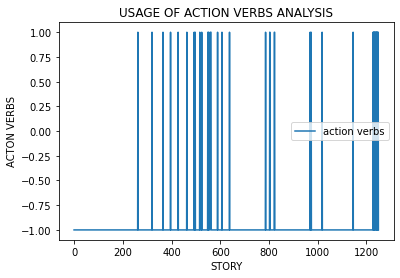

In [19]:
plt.plot(graph_calculation_list)
plt.xlabel('STORY')
plt.ylabel('ACTON VERBS')
plt.title('USAGE OF ACTION VERBS ANALYSIS')
plt.legend(['action verbs'])
plt.show()

In [20]:
len(get_words__) #Action Verbs number

41

In [21]:
len(input_text_list) # 초 입력한 단어(에세이)

656

## 입력한 에세이 문장에 Action Verbs가 얼마나 포함되어 있는지 포함비율 분석

In [22]:
action_verbs_ratio = round(len(get_words__)/len(input_text_list) *100, 3)
action_verbs_ratio

6.25

In [23]:
print ("ACTION VERBS RATIO :", action_verbs_ratio )

ACTION VERBS RATIO : 6.25


#############################################################

## 글에 표현된 감정이 얼마나 다양한지 분석 시작!!!!

참고자료: https://github.com/monologg/GoEmotions-pytorch

##  1. ekman 분석

In [50]:
from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

# @inproceedings{demszky2020goemotions,
#  author = {Demszky, Dorottya and Movshovitz-Attias, Dana and Ko, Jeongwoo and Cowen, Alan and Nemade, Gaurav and Ravi, Sujith},
#  booktitle = {58th Annual Meeting of the Association for Computational Linguistics (ACL)},
#  title = {{GoEmotions: A Dataset of Fine-Grained Emotions}},
#  year = {2020}
# }



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-ekman")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-ekman")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

In [52]:
text = """ I whispered quietly into her ear. I had waited three years to tell her in the hopes that she would understand, but she did not. Instead, she told me I was an abomination, and at that time I was fragile, so I believed her. Feeling terrible about myself, I fell into depression and gave up on school during the seventh grade. After failing all my classes that year, I began to hate school. However, when I realized that allowing my mother\u2019s words to affect me negatively would only lead to my demise, I renewed my focus on school, my grades improved, and they have been excellent ever since. Although at first words hurt me, they ultimately taught me courage and prepared me to fight ignorance and injustice.\nMy love for the written word helped me learn courage. I vividly remember my first time walking down the dusty, opaque hallways of Newark\u2019s Public Library. I picked up a stack of tattered and neglected books that, in many ways, reminded me of myself. I read the books in silence, inspired by each word I read. Each of the characters in the novels displayed courage that I hoped to embody. Percy Jackson fought valiantly against the Titan scourge, and Esmeralda Santiago fought against the American invasion of Mac\u00fan. Reading the accounts of their courage invited me to be courageous, so I began to speak out. I told my social worker about my dire situation, and she contacted my father. This courage also translated to my studies. I had previously been shy in class, but as I felt empowered by my new found courage, I began raising my hand to participate and ask questions about things I did not understand. More than authority figures, I began to see my teachers as a source of support and encouragement. The courage to build relationships with my teachers and the power of the words we have shared helped my scholarship grow tremendously.\nMy love for the spoken word also helped me prepare to speak out against ignorance and injustice. When my newly-found courage led me to join the debate club, my love for the written word was fed, as I read about the intersections between public policy and discrimination based on race, gender, and sexual preference. Reading and understanding the information was fairly easy for me, but the oral presentation required for debates was very challenging. To improve, I practiced incessantly. I worked with the upperclassmen on the debate team and I stayed after practice with my coach three days a week for three hours each day to prepare for my debates. With their help, I learned how to deliver oral arguments with the right cadence and tone to ensure my arguments were clear and concise. Though the advice my peers and coach gave me helped me tremendously, hearing their encouragement and support meant the world to me. Because of them, I developed the confidence I needed to present oral arguments that advocate for the marginalized and disenfranchised, and my passion for fighting against ignorance and injustice was born.\nBecause of my hard work and the great support I have received, I have become a successful student who takes full advantage of every course and extracurricular opportunity. The tremendous impact that the positive words of other have had on me inspired me to become a mentor for my middle and high school debate teams, which has allowed me to share the support and encouragement that was given to me with others. Ultimately, I am grateful that the curse my mother\u2019s words placed over my life has been broken by the words in my favorite novels, in my policy debates, and from my peers, teachers, and debate coach. These positive words and the courage they taught me have thus become my weapons of choice in the fight against ignorance and injustice.\n"""


In [53]:
# . 로 구분하여 리스트로 변환
re_text = text.split(".")

In [54]:
#데이터 전처리 
def cleaning(datas):

    fin_datas = []

    for data in datas:
        # 영문자 이외 문자는 공백으로 변환
        only_english = re.sub('[^a-zA-Z]', ' ', data)
    
        # 데이터를 리스트에 추가 
        fin_datas.append(only_english)

    return fin_datas

In [55]:
texts = cleaning(re_text)
re_emot =  goemotions(texts)
df = pd.DataFrame(re_emot)

#결과물을 다시 감정유형별 비율로 계산하여 새로운 데이터프레임을 만들자!
result_emotion = df['labels'].value_counts(normalize=True, sort=True, ascending=False, dropna=True) #문장 전체에서 각 값의 상대적 비율을 게산
print (result_emotion)

[joy]                  0.46875
[neutral]              0.21875
[joy, neutral]         0.12500
[anger]                0.06250
[joy, sadness]         0.03125
[disgust, joy]         0.03125
[neutral, surprise]    0.03125
[fear, sadness]        0.03125
Name: labels, dtype: float64


## 2. original 분석

In [56]:
from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint

In [61]:

tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-original")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-original")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

In [63]:
pprint(goemotions(texts))

[{'labels': ['neutral'], 'scores': [0.99010694]},
 {'labels': ['neutral'], 'scores': [0.92083114]},
 {'labels': [], 'scores': []},
 {'labels': ['sadness'], 'scores': [0.97777516]},
 {'labels': ['anger'], 'scores': [0.9794216]},
 {'labels': ['admiration', 'realization'], 'scores': [0.59597456, 0.9863381]},
 {'labels': ['admiration', 'disappointment'],
  'scores': [0.83684915, 0.9360176]},
 {'labels': ['love'], 'scores': [0.9794098]},
 {'labels': ['sadness', 'neutral'], 'scores': [0.42190862, 0.87501276]},
 {'labels': ['realization', 'neutral'], 'scores': [0.49774855, 0.76727396]},
 {'labels': ['neutral'], 'scores': [0.96283716]},
 {'labels': ['optimism'], 'scores': [0.97688454]},
 {'labels': ['neutral'], 'scores': [0.99877375]},
 {'labels': ['excitement'], 'scores': [0.38215816]},
 {'labels': ['neutral'], 'scores': [0.756077]},
 {'labels': ['neutral'], 'scores': [0.99616027]},
 {'labels': ['caring'], 'scores': [0.3008363]},
 {'labels': ['gratitude'], 'scores': [0.8691699]},
 {'labels': 

In [68]:
type(goemotions(texts))

list

In [109]:
len(goemotions(texts))

32

In [110]:
emo_re = goemotions(texts)

In [114]:
emo_all = []
for list_val in range(0, len(emo_re)):
    #print(emo_re[list_val]['labels'],emo_re[list_val]['scores'])
    #mo_all.append((emo_re[list_val]['labels'],emo_re[list_val]['scores'])) #KEY, VALUE만 추출하여 리스트로 저장
    #emo_all.append(emo_re[list_val]['scores'])
    emo_all.append((emo_re[list_val]['labels']))
    
emo_all

[['neutral'],
 ['neutral'],
 [],
 ['sadness'],
 ['anger'],
 ['admiration', 'realization'],
 ['admiration', 'disappointment'],
 ['love'],
 ['sadness', 'neutral'],
 ['realization', 'neutral'],
 ['neutral'],
 ['optimism'],
 ['neutral'],
 ['excitement'],
 ['neutral'],
 ['neutral'],
 ['caring'],
 ['gratitude'],
 ['admiration', 'approval'],
 ['love'],
 ['love'],
 ['neutral'],
 ['annoyance'],
 ['approval', 'neutral'],
 ['admiration'],
 ['gratitude'],
 ['approval'],
 ['admiration'],
 ['admiration'],
 ['gratitude'],
 ['approval', 'neutral'],
 ['neutral']]

In [153]:
from pandas.core.common import flatten #이중리스틀 FLATTEN
flat_list = list(flatten(emo_all))
flat_list

['neutral',
 'neutral',
 'sadness',
 'anger',
 'admiration',
 'realization',
 'admiration',
 'disappointment',
 'love',
 'sadness',
 'neutral',
 'realization',
 'neutral',
 'neutral',
 'optimism',
 'neutral',
 'excitement',
 'neutral',
 'neutral',
 'caring',
 'gratitude',
 'admiration',
 'approval',
 'love',
 'love',
 'neutral',
 'annoyance',
 'approval',
 'neutral',
 'admiration',
 'gratitude',
 'approval',
 'admiration',
 'admiration',
 'gratitude',
 'approval',
 'neutral',
 'neutral']

In [156]:
#중립적인 감정을 제외하고, 입력한 문장에서 다양한 감정을 모두 추출하고 어떤 감정이 있는지 계산해보자
unique = []
for r in flat_list:
    if r == 'neutral':
        pass
    else:
        unique.append(r)

unique

['sadness',
 'anger',
 'admiration',
 'realization',
 'admiration',
 'disappointment',
 'love',
 'sadness',
 'realization',
 'optimism',
 'excitement',
 'caring',
 'gratitude',
 'admiration',
 'approval',
 'love',
 'love',
 'annoyance',
 'approval',
 'admiration',
 'gratitude',
 'approval',
 'admiration',
 'admiration',
 'gratitude',
 'approval']

In [159]:
unique_re = set(unique)
unique_re

{'admiration',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'disappointment',
 'excitement',
 'gratitude',
 'love',
 'optimism',
 'realization',
 'sadness'}

## 글에 표현된 감정이 얼마나 다양한지 분석 결과!!!

In [161]:
#입력한 글에서 추출된 총 감정의 수이다. 
len(unique_re)

12

In [164]:
print("에세이에 표현된 다양한 감정 수:", len(unique_re))

에세이에 표현된 다양한 감정 수: 12


## 글에 담겨있는 CONFLICT 단어, 표현 수


In [165]:
len(confict_words_list)

46

In [166]:
print("글에 담겨있는 conflict 단어나 문장표현 수 : ",len(confict_words_list) )

글에 담겨있는 conflict 단어나 문장표현 수 :  46


In [24]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from IPython.display import display
lemmatizer = nltk.WordNetLemmatizer()

#word tokenizeing and part-of-speech tagger
# document = 'The little brown dog barked at the black cat'
tokens = [nltk.word_tokenize(sent) for sent in [input_text]]
print(input_text)
postag = [nltk.pos_tag(sent) for sent in tokens][0]

# Rule for NP chunk and VB Chunk
grammar = r"""
    NBAR:
        {<RB.?>*<VB.?>*<JJ>*<VB.?>+<VB>?} # Verbs and Verb Phrases
            
"""
#Chunking
cp = nltk.RegexpParser(grammar)

# the result is a tree
tree = cp.parse(postag)

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() =='NP'):
        yield subtree.leaves()
        
def get_word_postag(word):
    if pos_tag([word])[0][1].startswith('V'):
        return wordnet.VERB
    else:
        pass
    
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    postag = get_word_postag(word)
    word = lemmatizer.lemmatize(word,postag)
    return word

def get_terms(tree):    
    for leaf in leaves(tree):
        terms = [normalise(w) for w,t in leaf]
        yield terms

terms = get_terms(tree)

features = []
for term in terms:
    _term = ''
    for word in term:
        _term += ' ' + word
    features.append(_term.strip())
features

Bloomington Normal is almost laughably cliché for a midwestern city. Vast swathes of corn envelop winding roads and the heady smell of BBQ smoke pervades the countryside every summer. Yet, underlying the trite norms of Normal is the prescriptive force of tradition—the expectation to fulfill my role as a female Filipino by playing Debussy in the yearly piano festival and enrolling in multivariable calculus instead of political philosophy.So when I discovered the technical demand of bebop, the triplet groove, and the intricacies of chordal harmony after ten years of grueling classical piano, I was fascinated by the music's novelty. Jazz guitar was not only evocative and creative, but also strangely liberating. I began to explore different pedagogical methods, transcribe solos from the greats, and experiment with various approaches until my own unique sound began to develop. And, although I did not know what would be the 'best' route for me to follow as a musician, the freedom to forge wh

[]

In [25]:
def character(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #캐릭터 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    character_list = ['i', 'my', 'me', 'mine', 'you', 'your', 'they','them',
                      'yours', 'he','him','his' 'she','her','it','someone','their', 'myself', 'aunt',
                    'brother','cousin','daughter','father','grandchild','granddaughter','granddson','grandfather',
                    'grandmother','great-grandchild','husband','ex-husband','son-in-law', 'daughter-in-law','mother',
                    'niece','nephew','parents','sister','son','stepfather','stepmother','stepdaughter', 'stepson',
                    'twin','uncle','widow','widower','wife','ex-wife']
    
    ####문장에 char_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in character_list:
            if k == j:
                filtered_chr_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인
    
    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 캐릭터 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된 캐릭터 표현 총 수
        
    result_char_ratio = round(char_total_count/total_words * 100, 2)

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return result_char_ratio


In [26]:
character_ratio_result = character(input_text)
character_ratio_result

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


8.79

In [27]:

def setting_anaysis(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #setting을 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    location_list = ['above', 'behind','below','beside','betweed','by','in','inside','near',
                     'on','over','through']
    time_list = ['after', 'before','by','during','from','on','past','since','through','to','until','upon']
      
    movement_list = ['against','along','down','from','into','off','on','onto','out of','toward','up','upon']
    
    palce_terrain_type_list = ['wood', 'forest', 'copse', 'bush', 'trees', 'stand',
                                'swamp', 'marsh', 'wetland', 'fen', 'bog', 'moor', 'heath', 'fells', 'morass',
                                'jungle', 'rainforest', 'cloud forest','plains', 'fields', 'grass', 'grassland', 
                                'savannah', 'flood plain', 'flats', 'prairie','tundra', 'iceberg', 'glacier', 
                                'snowfields','hills', 'highland,' 'heights', 'plateau', 'badland', 'kame', 'shield',
                                'downs', 'downland', 'ridge', 'ridgeline','hollow,' 'valley',' vale','glen', 'dell',
                                'mountain', 'peak', 'summit', 'rise', 'pass', 'notch', 'crown', 'mount', 'switchback',
                                'furth','canyon', 'cliff', 'bluff,' 'ravine', 'gully', 'gulch', 'gorge',
                                'desert', 'scrub', 'waste', 'wasteland', 'sands', 'dunes',
                                'volcano', 'crater', 'cone', 'geyser', 'lava fields']
    
    water_list = ['ocean', 'sea', 'coast', 'beach', 'shore', 'strand','bay', 'port', 'harbour', 'fjord', 'vike',
                  'cove', 'shoals', 'lagoon', 'firth', 'bight', 'sound', 'strait', 'gulf', 'inlet', 'loch', 
                  'bayou','dock', 'pier', 'anchorage', 'jetty', 'wharf', 'marina', 'landing', 'mooring', 'berth', 
                  'quay', 'staith','river', 'stream', 'creek', 'brook', 'waterway', 'rill','delta', 'bank', 'runoff',
                  'channel', 'bend', 'meander', 'backwater','lake', 'pool', 'pond', 'dugout', 'fountain', 'spring', 
                  'watering-hole', 'oasis','well', 'cistern', 'reservoir','waterfall', 'falls', 'rapids', 'cataract', 
                  'cascade','bridge', 'crossing', 'causeway', 'viaduct', 'aquaduct', 'ford', 'ferry','dam', 'dike', 
                  'bar', 'canal', 'ditch','peninsula', 'isthmus', 'island', 'isle', 'sandbar', 'reef', 'atoll', 
                  'archipelago', 'cay','shipwreck', 'derelict']
    
    
    outdoor_places_list = ['clearing', 'meadow', 'grove', 'glade', 'fairy ring','earldom', 'fief', 'shire',
                            'ruin', 'acropolis', 'desolation', 'remnant', 'remains',
                            'henge', 'cairn', 'circle', 'mound', 'barrow', 'earthworks', 'petroglyphs',
                            'lookout', 'aerie', 'promontory', 'outcropping', 'ledge', 'overhang', 'mesa', 'butte',
                            'outland', 'outback', 'territory', 'reaches', 'wild', 'wilderness', 'expanse',
                            'view', 'vista', 'tableau', 'spectacle', 'landscape', 'seascape', 'aurora', 'landmark',
                            'battlefield', 'trenches', 'gambit', 'folly', 'conquest', 'claim', 'muster', 'post',
                            'path', 'road', 'track', 'route', 'highway', 'way', 'trail', 'lane', 'thoroughfare', 'pike',
                            'alley', 'street', 'avenue', 'boulevard', 'promenade', 'esplande', 'boardwalk',
                            'crossroad', 'junction', 'intersection', 'turn', 'corner','plaza', 'terrace', 'square', 
                            'courtyard', 'court', 'park', 'marketplace', 'bazaar', 'fairground','realm', 'land', 'country',
                            'nation', 'state', 'protectorate', 'empire', 'kingdom', 'principality','domain', 'dominion',
                            'demesne', 'province', 'county', 'duchy', 'barony', 'baronetcy', 'march', 'canton']

    
    underground_list = ['pit', 'hole', 'abyss', 'sinkhole', 'crack', 'chasm', 'scar', 'rift', 'trench', 'fissure',
                        'cavern', 'cave', 'gallery', 'grotto', 'karst',
                        'mine', 'quarry', 'shaft', 'vein','graveyard', 'cemetery',
                        'darkness', 'shadow', 'depths', 'void','maze', 'labyrinth'
                        'tomb', 'grave', 'crypt', 'sepulchre', 'mausoleum', 'ossuary', 'boneyard']
                        
    living_places_list = ['nest', 'burrow', 'lair', 'den', 'bolt-hole', 'warren', 'roost', 'rookery', 'hibernaculum',
                         'home', 'rest', 'hideout', 'hideaway', 'retreat', 'resting-place', 'safehouse', 'sanctuary',
                         'respite', 'lodge','slum', 'shantytown', 'ghetto','camp', 'meeting place,' 'bivouac', 'campsite', 
                         'encampment','tepee', 'tent', 'wigwam', 'shelter', 'lean-to', 'yurt','house', 'mansion', 'estate',
                         'villa','hut', 'palace', 'outbuilding', 'shack tenement', 'hovel', 'manse', 'manor', 'longhouse',
                         'cottage', 'cabin','parsonage', 'rectory', 'vicarge', 'friary', 'priory','abbey', 'monastery', 
                         'nunnery', 'cloister', 'convent', 'hermitage','castle', 'keep', 'fort', 'fortress', 'citadel', 
                         'bailey', 'motte', 'stronghold', 'hold', 'chateau', 'outpost', 'redoubt',
                         'town', 'village', 'hamlet', 'city', 'metropolis','settlement', 'commune']

    building_facilities_list = ['temple', 'shrine', 'church', 'cathedral', 'tabernacle', 'ark', 'sanctum', 'parish', 'university',
                                'chapel', 'synagogue', 'mosque','pyramid', 'ziggurat', 'prison', 'jail', 'dungeon',
                                'oubliette', 'hospital', 'hospice', 'stocks', 'gallows','asylum', 'madhouse', 'bedlam',
                                'vault', 'treasury', 'warehouse', 'cellar', 'relicry', 'repository',
                                'barracks', 'armoury','sewer', 'gutter', 'catacombs', 'dump', 'middens', 'pipes', 'baths', 'heap',
                                'mill', 'windmill', 'sawmill', 'smithy', 'forge', 'workshop', 'brickyard', 'shipyard', 'forgeworks',
                                'foundry','bakery', 'brewery', 'almshouse', 'counting house', 'courthouse', 'apothecary', 'haberdashery', 'cobbler',
                                'garden', 'menagerie', 'zoo', 'aquarium', 'terrarium', 'conservatory', 'lawn', 'greenhouse',
                                'farm', 'orchard', 'vineyard', 'ranch', 'apiary', 'farmstead', 'homestead',
                                'pasture', 'commons', 'granary', 'silo', 'crop','barn', 'stable', 'pen', 'kennel', 'mews', 'hutch', 
                                'pound', 'coop', 'stockade', 'yard', 'lumber yard','tavern', 'inn', 'pub', 'brothel', 'whorehouse',
                                'cathouse', 'discotheque','lighthouse', 'beacon','amphitheatre', 'colosseum', 'stadium', 'arena', 
                                'circus','academy', 'university', 'campus', 'college', 'library', 'scriptorium', 'laboratory', 
                                'observatory', 'museum']
    
    
    architecture_list = ['hall', 'chamber', 'room','nave', 'aisle', 'vestibule',
                        'antechamber', 'chantry', 'pulpit','dome', 'arch', 'colonnade',
                        'stair', 'ladder', 'climb', 'ramp', 'steps',
                        'portal', 'mouth', 'opening', 'door', 'gate', 'entrance', 'maw',
                        'tunnel', 'passage', 'corridor', 'hallway', 'chute', 'slide', 'tube', 'trapdoor',
                        'tower', 'turret', 'belfry','wall', 'fortifications', 'ramparts', 'pallisade', 'battlements',
                        'portcullis', 'barbican','throne room', 'ballroom','roof', 'rooftops', 'chimney', 'attic',
                        'loft', 'gable', 'eaves', 'belvedere','balcony', 'balustrade', 'parapet', 'walkway', 'catwalk',
                        'pavillion', 'pagoda', 'gazebo','mirror', 'glass', 'mere','throne', 'seat', 'dais',
                        'pillar', 'column', 'stone', 'spike', 'rock', 'megalith', 'menhir', 'dolmen', 'obelisk',
                        'statue', 'giant', 'head', 'arm', 'leg', 'body', 'chest', 'body', 'face', 'visage', 'gargoyle', 'grotesque',
                        'fire', 'flame', 'bonfire', 'hearth', 'fireplace', 'furnace', 'stove','window', 'grate', 'peephole', 
                        'arrowslit', 'slit', 'balistraria', 'lancet', 'aperture', 'dormerl']
    
    
    setting_words_filter_list = location_list + time_list + movement_list + palce_terrain_type_list + water_list + outdoor_places_list + underground_list + underground_list + living_places_list + building_facilities_list + architecture_list

    
    ####문장에 setting_words_filter_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_setting_text = []
    for k in token_input_text:
        for j in setting_words_filter_list:
            if k == j:
                filtered_setting_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_setting_text_ = set(filtered_setting_text) #중복제거
    filtered_setting_text__ = list(filtered_setting_text_) #다시 리스트로 변환
    print (filtered_setting_text__) # 중복값 제거 확인
    
    for i in filtered_setting_text__:
        ext_setting_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    setting_total_count = len(filtered_setting_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 setting 표현 수
    setting_count_ = len(filtered_setting_text__) #중복제거된 setting표현 총 수
        
    result_setting_words_ratio = round(setting_total_count/total_words * 100, 2)
    #return result_setting_words_ratio, total_sentences, total_words, setting_total_count, setting_count_, ext_setting_sim_words_key
    return result_setting_words_ratio



In [28]:


#paragraph 결과 도출 계산 - 시작 -
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_lg
nlp = en_core_web_lg.load()

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):

        keyword_key = ""
    

        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            
            keyword_key = str(keyword_key) + "," + str(key)
            if i > number:
                break
        
        print(keyword_key)
        return keyword_key
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight


def keywordsExtraction(text) :

    tr4w = TextRank4Keyword()
    tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
    
    keyword_key = ""

    """Print top number keywords"""
    node_weight = OrderedDict(sorted(tr4w.node_weight.items(), key=lambda t: t[1], reverse=True))
    list_keyword_key = []
    for i, (key, value) in enumerate(node_weight.items()):
        #print(key + ' - ' + str(value))
        
        # keyword_key = str(keyword_key) + "," + str(key)
        list_keyword_key.append(str(key))
        
        if i > 30:
            break
    
    
    
    #print(list_keyword_key)
    return list_keyword_key



#핵심주제어가 포함된 문장 추출
def findSentence(fileName, findText):

    result = []
    data = fileName
    data = data.splitlines()

    for line in data:
        sentences = line.split(". ")
        for sentence in sentences:
            sentence = sentence.strip(".")
            if findText in sentence:
                result.append(sentence + ".")

    return result



###### 각 문장이 전체 문단에서 어디에 위치해 있는지 확인하기
#문장을 비교해서 있으면 1, 없으면 0으로 표시하여 리스트로 반환

#우선 모든 문장을 데이터프레임에 .로 분리해서 넣기
def all_text_to_dataframe(text_input_):
    result_ = []
    data = text_input_
    data = data.splitlines()
    
    for line in data:
        sentences = line.split(".")
        result_.append(sentences)
    return result_



#그래프로 만들기 위해서는 value 값을 하나씩 Rj내서 새로운 dictionary로 만들어야 함
class Topic_keys(object):
    def __init__(self,topic_key):
        self.topic_key = topic_key

    def __str__(self):
        return self.topic_key

    def __repr__(self):
        return "'"+self.topic_key+"'"



# 4. Pagraph_Topic 관련 게산결과 도출
def paragraph(text):
    topic = keywordsExtraction(text) #핵심주제어 추출
    ######### 핵심문장이 어디 있는지 파악하기 위한 그래프 춮력
   #text.dispersion_plot(topic)

    #from collections import defaultdict #맨 위에서 한번에 임포트 할 것
    words = re.findall(r'\w+', str(text)) # breaks a line into words 단어로 분리해서 다음줄로 쭉~ 구분
    positions = defaultdict(list) # 딕셔너리를 만들고
    for index, word in enumerate(words): # 각 단어를 인덱스와 단어로 만들어서 디셔너리에 인덱스를 붙여서 넣고 
        positions[word].append(index)
    #단어의 위치를 추출하여 단어간 거리계산, 하나의 단어는 거리가 없음. 
    distances = {}
    for word, l in positions.items(): #위치값을 추출하여 반복문 돌림
        distances[word] = [m - n for n, m in zip(l, l[1:])] # 거리값은 같은 단어를 추출하여 위치값을 빼면 거리가됨 그것을 딕셔너리에 넣음
    #핵심주제어간의 거리를 모두 계산해보자.. 리스트에 주제어 {'language': [1392, 191, 391, 72, 77],'Jane'... 이런식으로 나옴}
    topic_word_distance = {}
    for topic_word in topic:
        for k, v in distances.items():
            if k == topic_word:
                topic_word_distance[k] = v

    #print (topic_word_distance)
    
    dic__ = {}
    for k, v in topic_word_distance.items():
        for i in v:
            dic__[Topic_keys(k)] = i

    #test_df = pd.DataFrame.from_dict(dic__, orient='index')
    test_df = pd.DataFrame(dic__, index=[0])
    df__ = test_df.transpose() #change rows colums
    df__.reset_index(level=0, inplace=True)
    df__.columns = ["Topic", "Distance"]

    #최대값과 최소값 추출하여 계산에서 제외할 것(값 보정을 위해서)
    max_ = df__['Distance'].max()
    #최소값 추출
    min_= df__['Distance'].min()
    #거리 평균값 계산
    distance_mean = df__['Distance'].mean()
    #값 보정 - 최대값은 평균값으로, 최소값도 평균값으로 보정
    audj_df_max = df__.replace(max_, distance_mean)
    re_df = audj_df_max .replace(min_, distance_mean) # 최종 보정값 도출

    #각 항목을 평균값과 비교해서 큰 수를 도출해서 전체 인덱스에서 도출한 인덱스의 비율을 계산
    cohesion_df = "Distance > @distance_mean"
    df_big_q = re_df.query(cohesion_df) #평균값보다 큰 값들을 추출
    len(df_big_q) #몇개인지 추출
    len(re_df)# 전체 데이터가 몇개인지 추출
    paragraph_cohesiion_reation = round(len(df_big_q) / len(re_df) * 100)
    paragraph_cohesiion_reation 

    # 결과해석   1~30: 문단구조가 퍼져있음(짜임새 매우 부족) 31~60 : 문단구조가 적당함, 61이상~ : 문단이 확연히 구조화 되어 있음
    return paragraph_cohesiion_reation 


def result_plot(input_text) :

    input_text = str(input_text)
    # 1. Conflict 계산 결과 도출
    
    try : 
        re_conflict = conflict(input_text)
    except :
        
        re_conflict = {
            "pos" : 0.5,
            'neg' : 0.5
        }
        

    # print ("1.conflict : ", re_conflict)
    # 2. Character 계산 결과 도출
    
    try : 
        re_character = character(input_text)
    
    except: 
        print("re_character error ")
        re_character = 10 #####default 13 
    # print ("2.character :", re_character)
    # 3. Setting 계산 결과 도출
    
    try : 
        re_setting = setting_anaysis(input_text)
        
    except :
        print ("setting_anaysis error") 
        re_setting = 10  #####default 16
     
    # print ("3.setting :", re_setting)
    # 4. Pagraph_Topic 관련 게산결과 도출, 결과해석 1~30: 문단구조가 퍼져있음(짜임새 매우 부족) 31~60 : 문단구조가 적당함, 61이상~ : 문단이 확연히 구조화 되어 있음
    
    try : 
        re_paragraph = paragraph(input_text)
    except:
        print ("paragraph error")
        re_paragraph = 10
     
    # print ("4.paragraph :", re_paragraph)

    


    dict_plot = {
        "pos" :   round(float(re_conflict['pos']),3),
        "neg" :   round(float(re_conflict['neg']),3),
        "character" :  re_character,
        "setting" : re_setting,
        "paragraph" : re_paragraph  
    }

    return dict_plot

In [29]:
result = result_plot(input_text)
result

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


['way', 'trail', 'sound', 'through', 'on', 'up', 'to', 'against', 'above', 'camp', 'path', 'until', 'city', 'by', 'forge', 'view', 'during', 'after', 'from', 'route', 'before', 'in']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


{'pos': 0.5, 'neg': 0.5, 'character': 8.79, 'setting': 12.34, 'paragraph': 38}